# Extract Pluto bladed pixels on LORRI images

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#from ssi import LORRI
from ssi.geol import PLUTO #final code is this + Pluto_BS code
# from scipy.stats import linregress
# from scipy.optimize import curve_fit
from ssi import SSI, LORRI

In [2]:
#img = LORRI('lor_0299147337_0x636_sci.pho.cub')
#img = LORRI('lor_0299176871_0x636_sci.pho.cub') #no bladed region
img = LORRI('lor_0299148263_0x630_sci.pho.cub', offset_l=-18, offset_s=10) #good coverage of bladed terrain, phase 17, theta = 40
#img = LORRI('lor_0299147481_0x636__sci.pho.cub') #no bladed terrain
#img = LORRI('lor_0299148215_0x632__sci.pho.cub') #no bladed terrain
#img = LORRI('lor_0299152807_0x636_sci.pho.cub') #no bladed terrain
#img = LORRI('lor_0298992789_0x636_sci.pho.cub',offset_l=0, offset_s=15) #far sided bladed terrain, phase 15.4, theta 0
#img = LORRI('lor_0299067359_0x636_sci.pho.cub',offset_l=-3, offset_s=3)

img_geol = PLUTO(img, legend=False)

C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ssi\ssi.py:205: RuntimeWarning: invalid value encountered in remainder
  return - self.lon_e % 360
C:\Users\rajanidh\AppData\Local\Continuum\anaconda3\lib\site-packages\ssi\geol\units.py:34: RuntimeWarning: invalid value encountered in remainder
  i = np.round(-lon_w % 360 * w / 360).astype(int)


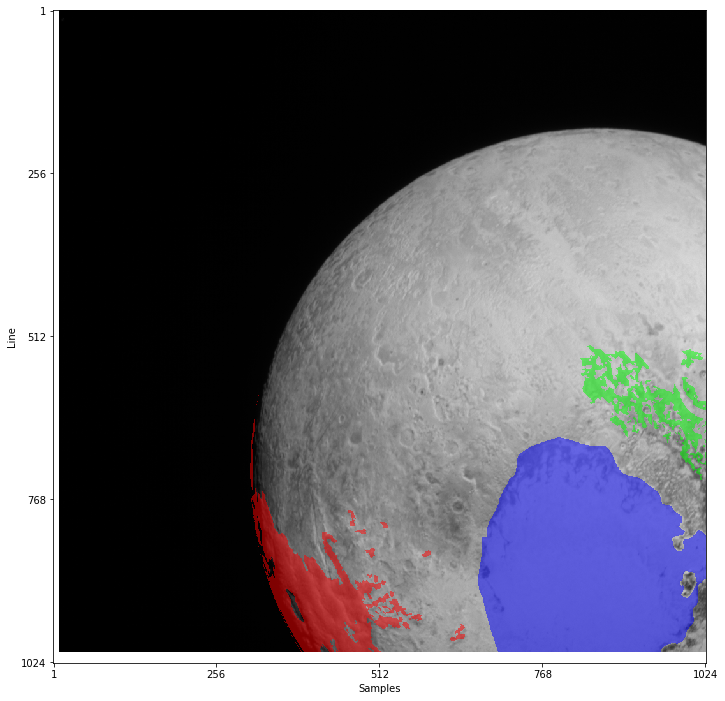

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')#, origin='lower')
ax.imshow(img_geol, cmap=PLUTO.CMAP, extent=img.extent, alpha=.5)#, origin='lower') #

#ax.imshow(img.emi, extent=img.extent, alpha=.3) #cmap='jet'

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks);

In [38]:
units_geol = PLUTO(img)

mask_inc = np.less(img.inc, 75, where=img.ground)
mask_emi = np.less(img.emi, 75, where=img.ground)
#mask_data = np.less(img.data, 0.7, where=img.ground)
mask_data = np.less(img.data, 0.69 , where=img.ground)
#mask_sample = np.equal(img.sample, 420, where=img.ground)
#mask_lat = np.greater(img.lat, 80, where=img.ground)

#mask = mask_inc & mask_emi & img.ground 
#mask = (units_geol.data == 'Bladed units') & mask_inc & mask_emi & img.ground #& mask_col#& mask_sample
#mask = (units_geol.data == 'Washboard units') & mask_inc & mask_emi & img.ground #& mask_sample
mask = (units_geol.data == 'Sputnik Planitia') & mask_inc & mask_emi & img.ground & mask_data

Check that the mask lays over the bladed terrain

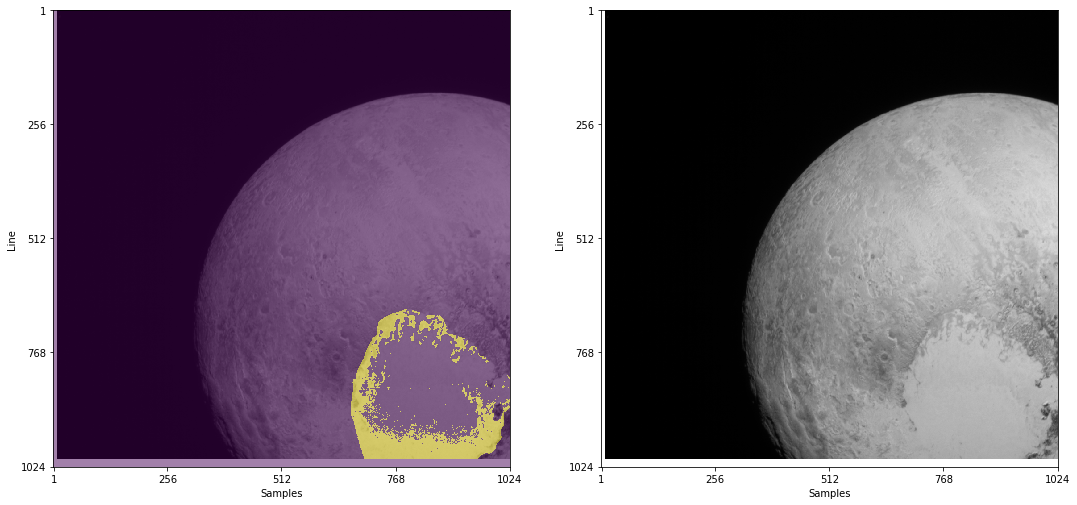

In [39]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 12))

ax0.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')#, origin='lower')
ax0.imshow(mask, extent=img.extent, alpha = 0.5)#, vmin = 0, vmax = 1)#, origin='lower')

ax1.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')#, origin='lower')


for ax in (ax0, ax1):
    ax.set_xlabel('Samples')
    ax.set_ylabel('Line')
    ax.set_xticks(img.sticks)
    ax.set_yticks(img.lticks);

#ax.set_xlim(356, 658)
#ax.set_ylim(650, 356)

#    ax.set_xlim(256,512)
#    ax.set_ylim(1024,768)



In [37]:
np.savetxt(
    f'{img.filename[:24]}-WB.csv',
    np.transpose([
      img.data[mask],
      img.inc[mask],       
      img.emi[mask],       
      img.phase[mask],
      #img.sample[mask],
      #img.line[mask],
    ]),
    #header='I/F, inc, emi, phase', #comment if you don't need the header
    delimiter=',',#" " and a .txt, add a space rather than a \t
    fmt='%.3f, %.1f, %.1f, %.1f,'
    )

In [8]:
mask_inc = np.less(img.inc, 75, where=img.ground)
mask_emi = np.less(img.emi, 75, where=img.ground)
#mask_lat = np.greater(img.lat, 50, where=img.ground)
#mask_lat_2 = np.less(img.lat, 65, where=img.ground)
mask_lon = np.greater(img.lon, 50, where=img.ground)   #img.lon was 200 to 220 for washboard terrain
mask_lon_2 = np.less(img.lon, 120, where=img.ground)
#mask_line = np.equal(img.line, 920, where=img.ground)

#mask = (units_geol.data == 'Bladed units') & mask_lat & mask_lat_2 & mask_inc & mask_emi & img.ground & mask_lon & mask_lon_2
#mask = (units_geol.data == 'Bladed units') & mask_inc & mask_emi & img.ground
mask = (units_geol.data == 'Sputnik Planitia')& mask_inc & mask_emi & img.ground #& mask_lat & mask_lat_2 
#mask = (units_geol.data == 'Bladed units')& mask_line & mask_inc & mask_emi & img.ground
#mask = (units_geol.data == 'Sputnik Planitia') & mask_line & img.ground 

In [9]:
inc = img.inc[mask]
phase = img.phase[mask]
#np.max(inc), np.min(inc), np.mean(inc)

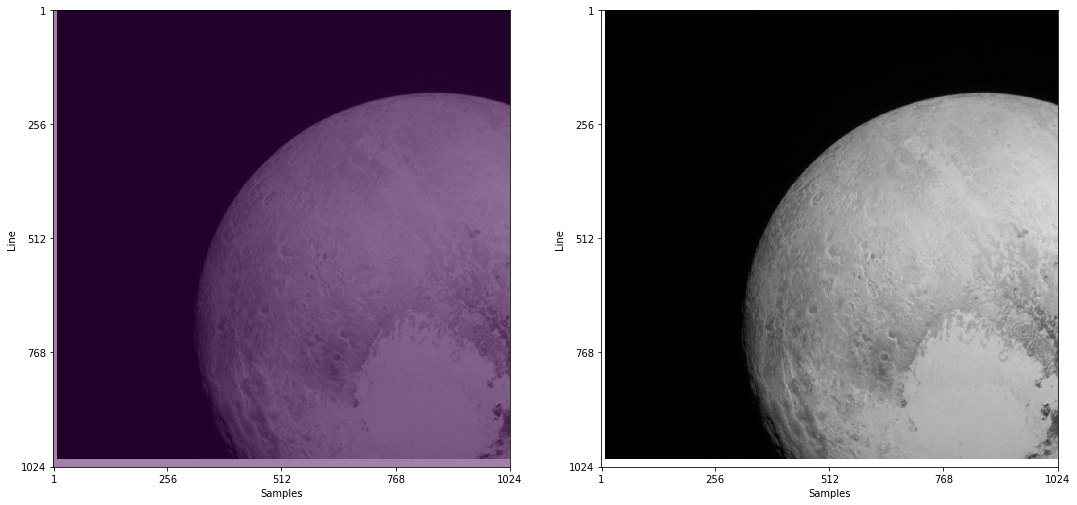

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 12))

ax0.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')
ax0.imshow(mask, extent=img.extent, alpha=0.5)

ax1.imshow(img.data, extent=img.extent, vmin=0, vmax=1, cmap='gray')


for ax in (ax0, ax1):
    ax.set_xlabel('Samples')
    ax.set_ylabel('Line')
    ax.set_xticks(img.sticks)
    ax.set_yticks(img.lticks);

In [11]:
np.savetxt(
    f'{img.filename[:24]}-Putative.csv',
    np.transpose([
      img.data[mask],
      img.inc[mask],
      img.emi[mask],
      img.phase[mask],
      #img.sample[mask],
      #img.line[mask],
    ]),
    #header='I/F, inc, emi, phase',
    delimiter=', ',
    fmt='%.3f, %.1f, %.1f, %.1f,'
    )

In [105]:
#L = 300
#i_f = img.data[:, L]
#inc = img.inc[:, L]
#emi = img.emi[:, L]
#mu0 = img.mu0[:, L]
#mu1 = img.mu1[:, L]


S = 420
i_f = img.data[:, S]
inc = img.inc[:, S]
emi = img.emi[:, S]
#mu0 = img.mu0[:, S]
#mu1 = img.mu1[:, S]

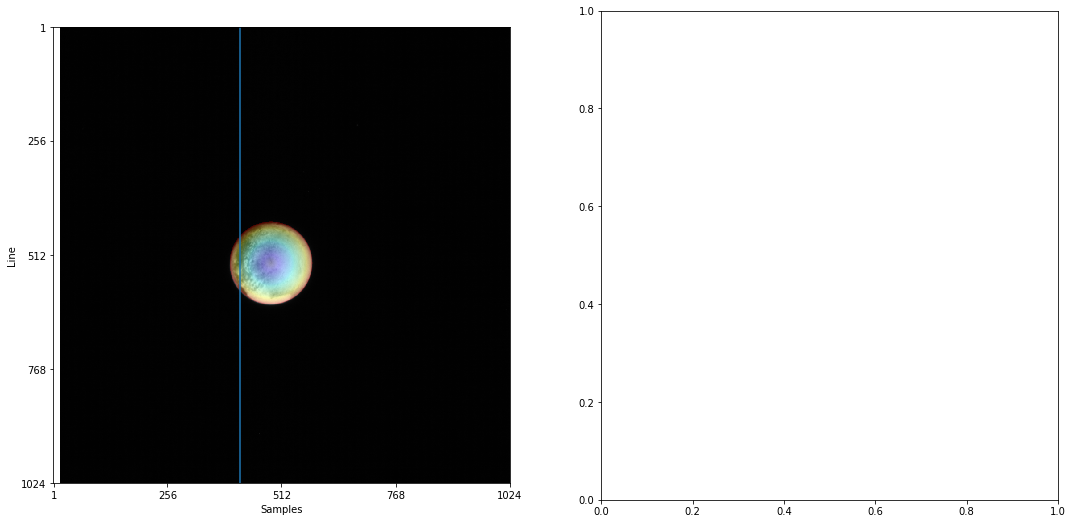

In [106]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18, 9))

ax0.imshow(img.data, cmap='gray', extent=img.extent)
ax0.imshow(img.emi, cmap='jet', extent=img.extent, alpha=.3)
#ax0.axhline(L)
ax0.axvline(S)

ax0.set_xlabel('Samples')
ax0.set_ylabel('Line')
ax0.set_xticks(img.sticks)
ax0.set_yticks(img.lticks)


In [25]:
np.savetxt(
    f'{img.filename[:24]}-bladed_units.csv',
    np.transpose([
      img.data[mask],
      img.inc[mask],
      img.emi[mask],
      img.phase[mask],
      img.sample[mask],
      img.line[mask],
    ]),
    header='I/F, inc, emi, phase, S, L',
    delimiter=', ',
    fmt='%.3f, %.1f, %.1f, %.1f, %d, %d',
)

In [122]:
np.savetxt(
    f'{img.filename[:24]}-bladed_units_line300.csv',
    np.transpose([
      img.data[:, L],
      img.inc[:, L],
      img.emi[:, L],
      img.phase[:, L],
      img.sample[:, L],
      img.line[:, L],
    ]),
    header='I/F, inc, emi, phase, S, L',
    delimiter=', ',
    fmt='%.3f, %.1f, %.1f, %.1f, %d, %d',
)